## **Mall Customer Segmentation Project Using Clustering Algorithms**

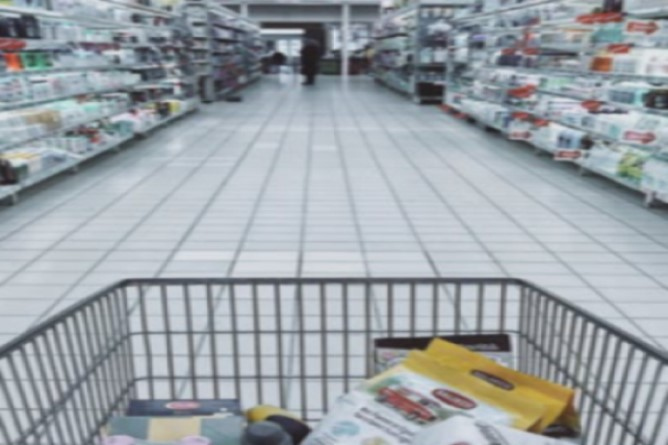

## **Introduction**


Welcome! Friends to this tutorial. I am delited to share this project(Mall Customer Segmentation) with you, and I believe you will enjoy it. Clustering is a very important Unsupervised Machine Learning technique that helps to group individual items into various categories based on their similarities and differences.There are various kinds of Clustering Algorithms, but in this project i will focus on KMeans and DBSCAN Clustering.

## **This project will be divided into 10 steps:**
1) Python Libraries For The Project

2)  Data Source

3) Loading and preprocessing of data

4) Exploratory Data Analysis

5) Feature Selection

6) Feature Transformation


7) KMeans Clustering


8) DBSCAN Clustering Model


 9) Models Performance And Evaluation Using Sihoutte Coefficient


10) Impact Of Clustering Analysis On The Business Decision Making




In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Note: If you don't want to go through the blog you can find the notebook on this link: https://colab.research.google.com/drive/1n3uhkjoVE855ibEm9pLRnEAizwMX32-n?usp=sharing

**1) Python Libraries For The Project**

Import the needed libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics

**2)Data Source**

The dataset is from kaggle.com(a platform for datascience competitions and opensource data).

You can also check it out.

**3)Loading and preprocessing of data**

I load the data into my dataframe called df.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datascience_file/mail customer.csv')

     Then check the first five rows.

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


 Replace the following column names:

Genre = Gender

Spending Score (1-100) = Spending_Score

Annual Income (k$) = Annual_Income

In [ ]:
df.rename(columns = {'Genre': 'Gender','Spending Score (1-100)':'Spending_Score','Annual Income (k$)':'Annual_Income'},inplace=True)

check for null values

In [ ]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

Drop unecessary Column(s)

In [ ]:
df = df.drop("CustomerID",axis=1)

**4)Exploratory Data Analysis**

Here I will explore the data by asking the following questions:

a)How many customers the Mall has based on the dataset?

b)Do we have more female customers?

c)How does Gender Influence Spending?

d)What is the Age Distribution of customers?

e)How does  Age relates to the spending of customers?

f)What is the Distribution Of Anual Income? And How does it relates with Spending Score?

g)What is the Distribution of Spending Score?

Note: Our target feature is the Spending Score, which indicate how much a customer spends. We will compare other features with it so as to understand each customer's spending behaviour.

**a) How many customers the Mall has based on the dataset?**

In [ ]:
print('There are {} customers.'.format(len(df)))

There are 200 customers.


**b) Do we have more female customers?**

In [ ]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

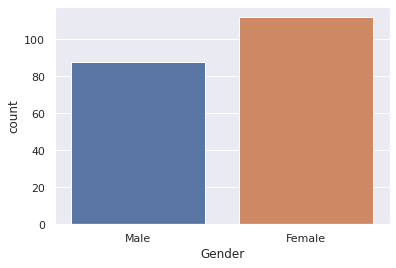

In [ ]:
sns.set() 
sns.countplot(x=df.Gender,data=df)
plt.show()

both the bar chart and counts show that there are more females than male customers.

**c) How does Gender Influence Spending?**

In [ ]:
pd.pivot_table(df,index=["Gender"],values=["Spending_Score"])

,Spending_Score
Gender,
Female,51.526786
Male,48.511364


Females spend slightly more than males.




**d) What is the Age Distribution of customers?**

In [ ]:
print('mean is {0} and median is {1}'.format(df.Age.mean(),df.Age.median()))

mean is 38.85 and median is 36.0


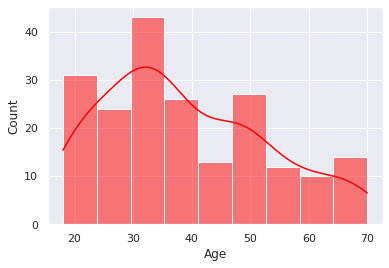

In [ ]:
sns.histplot(df.Age,kde=True,color='red')

Most  of the customers are within 25 to 40yrs old with an average age of 38.85 and median age of 36yrs.



**e) How does Age relates to the spending of customers?**

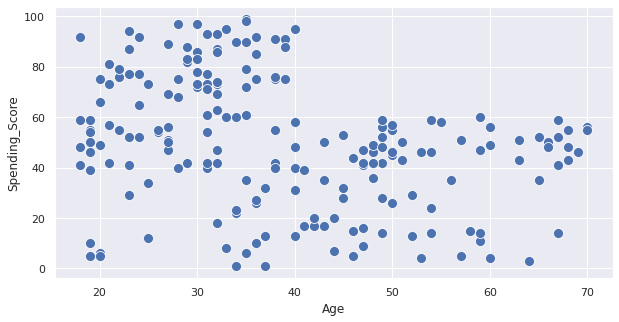

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.Age,y=df.Spending_Score,s=100)

From the scatterplot it shows that younger people tend to spend more.



**f) What is the Distribution Of Anual Income? And How does it relates with Spending Score?**

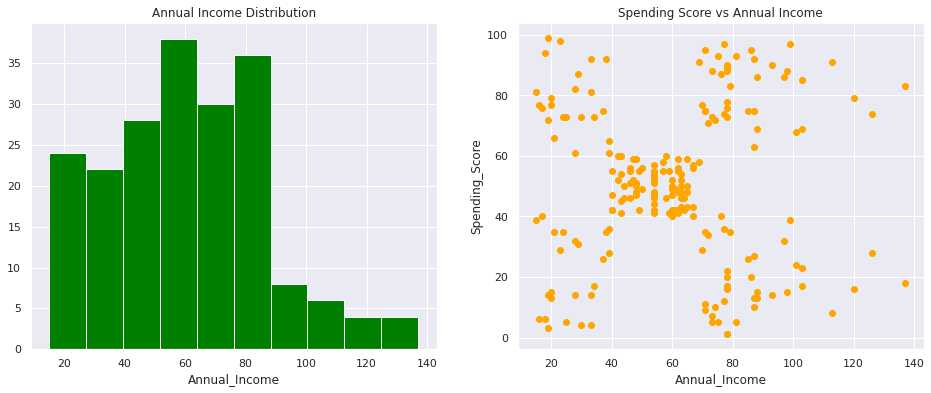

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,6))
ax[0].hist(df.Annual_Income,color='green')
ax[0].set(title='Annual Income Distribution',xlabel='Annual_Income')

ax[1].scatter(df.Annual_Income,df.Spending_Score,color='orange')
ax[1].set(xlabel='Annual_Income',ylabel='Spending_Score',title='Spending Score vs Annual Income')
plt.show()

**g) What is the Distribution of Spending Score?**


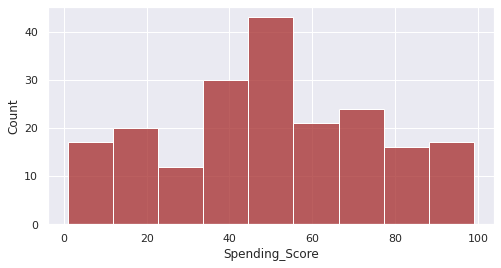

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df.Spending_Score,color='brown')
plt.show()

Spending Score is normally distributed

**5) Feature Selection**



From the exploratory data analysis above, it is obvious that all the variables have some sort of relationship with spending score.
We will be using all the variables to build the clustering models.

Drop unneccessary column

**6) Feature Transformation**

Since the Gender column datatype is categorical, then we have to convert it into a numerical datatype using one hot encoding(pandas.get_dummies).

In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df.head()

,Age,Annual_Income,Spending_Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


## **7) KMeans Clustering**

Initialize cluster

In [ ]:
k_cluster = KMeans(n_clusters=5, random_state=0)

Lets use the elbow method to find the best number of clusters

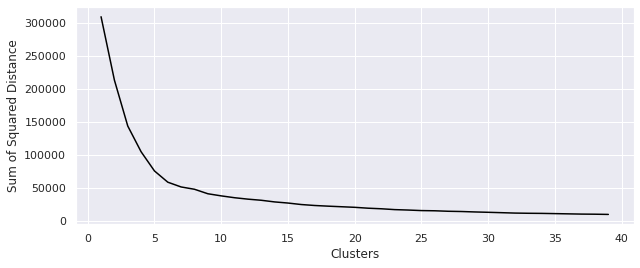

In [ ]:
ssq_distance = []
for k in range(1 ,40):
    cluster = KMeans(n_clusters=k, random_state=0)
    cluster.fit(df)
    ssq_distance.append(cluster.inertia_)
    
plt.figure(1 , figsize = (10 ,4))
plt.plot(list(range(1,40)), ssq_distance,color='black')
plt.xlabel('Clusters') , plt.ylabel('Sum of Squared Distance')
plt.show()

Fit the data and get the labels

In [ ]:
k_cluster.fit(df)
k_labels = k_cluster.labels_

How does the clusters relate with our variables?

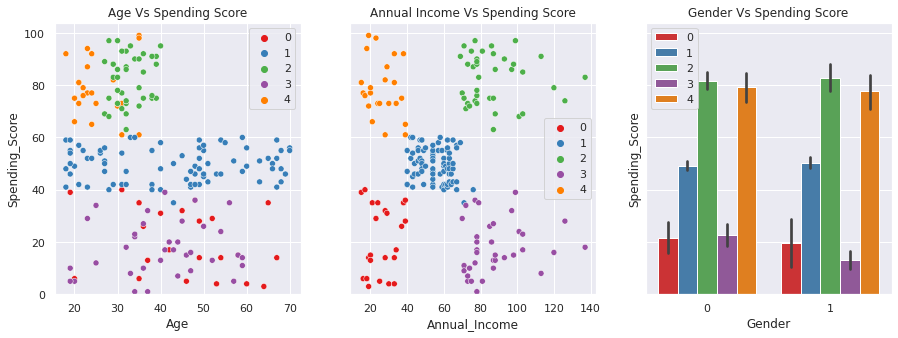

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0],x=df.Age, y=df.Spending_Score,hue=k_labels,palette='Set1')
axes[0].set_title('Age Vs Spending Score')

sns.scatterplot(ax=axes[1], x=df.Annual_Income, y=df.Spending_Score,hue=k_labels,palette='Set1')
axes[1].set_title('Annual Income Vs Spending Score')

sns.barplot(ax=axes[2], x=df.Gender_Male, y=df.Spending_Score,hue=k_labels,palette='Set1')
axes[2].set_title('Gender Vs Spending Score')
axes[2].set_xlabel('Gender')
plt.show()

From the plots above, it is obvious that Age is the most important factor in determininig Spending Score. Irrespective of their Annual income, younger people tend to spend more.

# **8) DBSCAN Clustering Model**

Initialsze DBSCAN Clustering

In [ ]:
#dbscan model
dbscan=DBSCAN(eps=12,min_samples=7.5)
# Fit the model
cluster=dbscan.fit(df)
db_labels=cluster.labels_

Lets calculate the number clusters found by the algorithm

In [ ]:
no_clusters=len(set(db_labels))- (1 if -1 in db_labels else 0)
print('there are {} clusters'.format(no_clusters))

there are 4 clusters


How to find the best values for epsulum and min_samples?

You will have to experiment with diferent values, but i often use "for loop" to find min_samples as shown in the code below

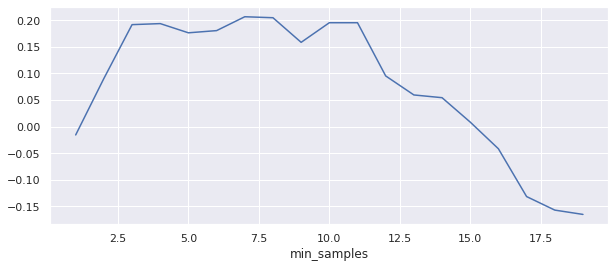

In [ ]:
sh_score = []
for num in range(1,20):
  dbscan=DBSCAN(eps=12,min_samples=num)
  model=dbscan.fit(df)
  d_labels=model.labels_
  score = metrics.silhouette_score(df,d_labels)
  sh_score.append(score)
plt.figure(figsize=(10,4))
plt.plot(list(range(1,20)),sh_score)
plt.xlabel('min_samples')
plt.show()

How does the clusters relate with our variables?

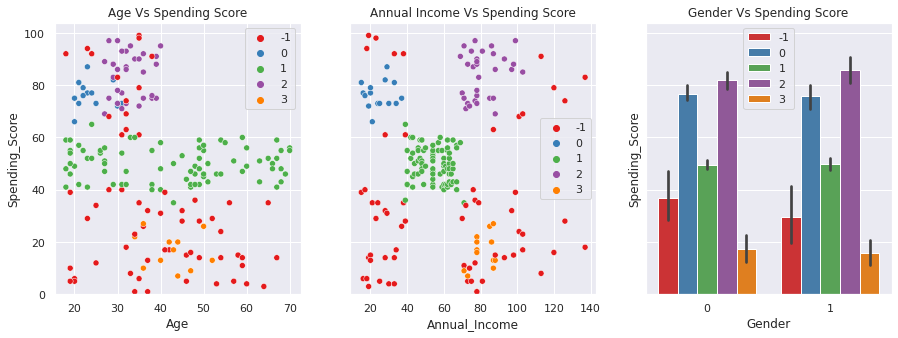

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(ax=axes[0],x=df.Age, y=df.Spending_Score,hue=db_labels,palette='Set1')
axes[0].set_title('Age Vs Spending Score')

sns.scatterplot(ax=axes[1], x=df.Annual_Income, y=df.Spending_Score,hue=db_labels,
                palette='Set1')
axes[1].set_title('Annual Income Vs Spending Score')

sns.barplot(ax=axes[2], x=df.Gender_Male, y=df.Spending_Score,hue=db_labels
            ,palette='Set1')
axes[2].set_title('Gender Vs Spending Score')
axes[2].set_xlabel('Gender')
plt.show()

Similarly,DBSCAN also shows that Age is the most import factor to consider as younger people spend more irrespective of their Annual income.

## **9) Models Performance And Evaluation Using Sihoutte Coefficient**

For KMeans

In [ ]:
coef = metrics.silhouette_score(df,k_labels)
print('The sihoutte score is {}'.format(coef))

The sihoutte score is 0.45205475380756527


For DBSCAN

In [ ]:
coef = metrics.silhouette_score(df,db_labels)
print('The sihoutte score is {}'.format(coef))

The sihoutte score is 0.20473300000169162


KMeans Clustering performs better than DBSCAN Clustering.

# **10) Impact Of Clustering Analysis On The Business Decision Making**


From the analysis we saw that younger people aged between 20 to 40 patronize the product(s)/service(s) more than older people.The business should target Ads on this population, as they will get highier turnover and conversion rate.

It is also seen that female customers are slightly more than male customers, and they spend more even if their annual income is less than 50.This may represent a very desperate group, that needs the product(s) more. This is an area the business should obtain more data on for further analysis. 

# **Conclusion**
Thank you for reading this blog post,I hope you gain something from it. See you next  time!.

# **reference**
kaggle.com

Krish naik dbscan clustering tutorial 

Tales Bruno Subplotting with matplotlib and seaborn

stack overflow

sklearn documentation